# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


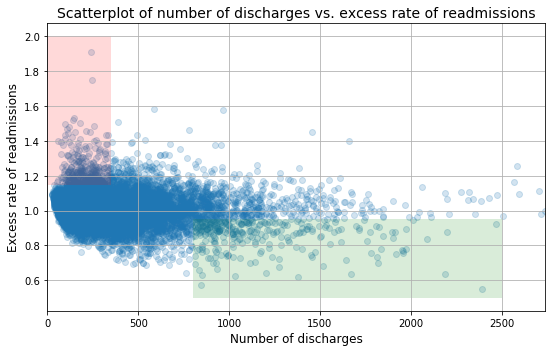

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

I don't agree with the analysis nor recommendations.

A graph is useful to explore the data but using only one scatter plot to draw conclusions is irresponsible. To be able to provide recommendations, a more profound analysis is required. 

Also, the conclusions are incorrect, misleading and unfounded. The graph doesn’t show a “significant” correlation and it’s impossible to conclude that “Smaller hospitals may be lacking necessary resources to ensure quality care and prevent readmissions”

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

An EDA will follow to review the data and draw hipotesis

In [5]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [6]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [7]:
# Hospitals with no Readmission information will be removed from the data
clean_hospital_read_df = clean_hospital_read_df[81:]

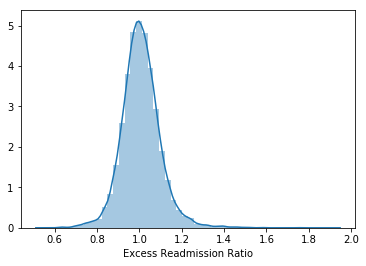

In [8]:
# Plot of distribution of Excess Ratio
sns.distplot(clean_hospital_read_df["Excess Readmission Ratio"])

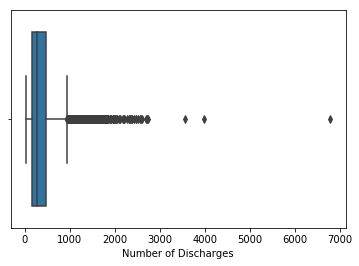

In [9]:
sns.boxplot(x="Number of Discharges", data=clean_hospital_read_df)

In [10]:
# Creating a new column to place every hospital into a category based on the 20, 40, 60 and 80 percentiles
bins = [0]
bins.extend(np.percentile(clean_hospital_read_df["Number of Discharges"], [20, 40, 60, 80]))
bins.append(float("inf"))
bins

[0, 138.0, 228.0, 344.0, 534.0, inf]

In [11]:
labels = ["<=138", "138 - 228", "228 - 344", "344 - 534", ">534"]

In [12]:
clean_hospital_read_df["Number of patients"] = pd.cut(clean_hospital_read_df["Number of Discharges"], bins=bins, labels=labels)
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Number of patients
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013,<=138
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013,<=138
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013,<=138
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013,<=138
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013,<=138


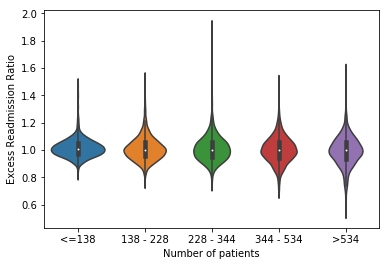

In [13]:
# Violin plot of distributions by categories created
sns.violinplot(x="Number of patients", y="Excess Readmission Ratio", data=clean_hospital_read_df)

In [14]:
by_np = clean_hospital_read_df[["Number of patients", "Predicted Readmission Rate", "Expected Readmission Rate"]].groupby(["Number of patients"]).sum()

In [15]:
by_np["Excess Readmission Ratio"] = by_np["Predicted Readmission Rate"] / by_np["Expected Readmission Rate"]

In [16]:
by_np

,Predicted Readmission Rate,Expected Readmission Rate,Excess Readmission Ratio
Number of patients,,,
<=138,45061.2,44473.9,1.013205
138 - 228,41670.5,41468.3,1.004876
228 - 344,40591.5,40331.3,1.006452
344 - 534,40128.4,39944.7,1.004599
>534,39313.8,39183.7,1.003320


It looks there is no significance difference in the rations of hospital grouped by number of patients.

EDA will follow to examine if there is a difference in the hospitals by state

In [17]:
by_state = clean_hospital_read_df[["State", "Predicted Readmission Rate", "Expected Readmission Rate"]].groupby("State").sum()

In [18]:
by_state["Excess Readmission Ratio"] = by_state["Predicted Readmission Rate"] / by_state["Expected Readmission Rate"]

([], <a list of 0 Text xticklabel objects>)

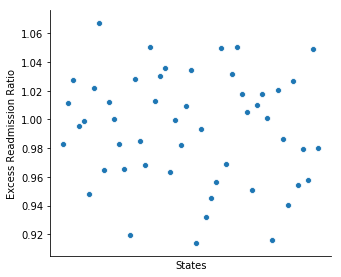

In [19]:
sns.relplot(x=by_state.index, y="Excess Readmission Ratio", data=by_state)
plt.xlabel("States")
plt.xticks([])

Apparently, there is an important difference in the Readmission Ratio by states. Will explore this further

In [20]:
by_state[by_state["Excess Readmission Ratio"] > 1].sort_values("Excess Readmission Ratio")

,Predicted Readmission Rate,Expected Readmission Rate,Excess Readmission Ratio
State,,,
GA,6357.9,6357.8,1.000016
SC,3497.1,3493.5,1.001030
OK,3901.6,3881.1,1.005282
MO,4936.9,4890.8,1.009426
PA,9975.3,9877.2,1.009932
AL,4695.8,4641.2,1.011764
FL,13022.7,12862.5,1.012455
LA,4545.7,4486.7,1.013150
RI,756.3,743.3,1.017490


Per the information above, the Excess Ratios higher than 1 seem to be focused on the Northeast and South regions of the US.

In [21]:
us_regions = {"Northeast" : ["ME", "NH", "VT", "MA", "RI", "CT", "NY", "PA", "NJ"], 
              "Midwest" : ["WI", "MI", "IL", "IN", "OH", "ND", "SD", "NE", "KS", "MN", "IA", "MO"], 
              "South" : ["DE", "MD", "DC", "VA", "WV", "NC", "SC", "GA", "FL", "KY", "TN", "MS", "AL", "OK", "TX", "AR", "LA"],
              "West" : ["ID", "MN", "WY", "NV", "UT", "CO", "AZ", "NM", "AK", "WA", "OR", "CA", "HI"]}

In [22]:
def include_regions(data):
    
    us_regions = {"Northeast" : ["ME", "NH", "VT", "MA", "RI", "CT", "NY", "PA", "NJ"], 
              "Midwest" : ["WI", "MI", "IL", "IN", "OH", "ND", "SD", "NE", "KS", "MN", "IA", "MO"], 
              "South" : ["DE", "MD", "DC", "VA", "WV", "NC", "SC", "GA", "FL", "KY", "TN", "MS", "AL", "OK", "TX", "AR", "LA"],
              "West" : ["ID", "MN", "WY", "NV", "UT", "CO", "AZ", "NM", "AK", "WA", "OR", "CA", "HI"]}
    
    for region, statelist in us_regions.items():
        if data in statelist:
            return region

In [23]:
by_state["Region"] = by_state.index.to_series().apply(include_regions)

In [24]:
by_region = by_state.groupby("Region").sum()

In [25]:
by_region["Excess Readmission Ratio"] = by_region["Predicted Readmission Rate"] / by_region["Expected Readmission Rate"]

In [26]:
by_region

,Predicted Readmission Rate,Expected Readmission Rate,Excess Readmission Ratio
Region,,,
Midwest,49059.5,49192.9,0.997288
Northeast,37164.5,36159.7,1.027788
South,86947.2,85977.9,1.011274
West,32976.8,33395.8,0.987454


In [27]:
clean_hospital_read_df["Region"] = clean_hospital_read_df["State"].apply(include_regions)

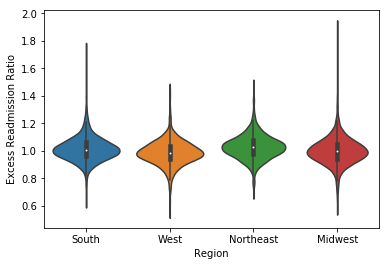

In [28]:
sns.violinplot(x="Region", y="Excess Readmission Ratio", data=clean_hospital_read_df)

Text(0.5,6.8,'Region')

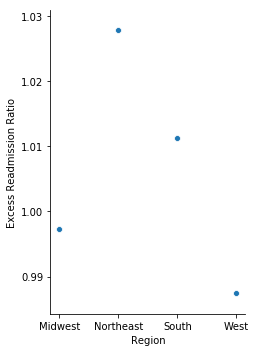

In [29]:
sns.relplot(x=by_region.index, y=by_region["Excess Readmission Ratio"], data=by_region)
plt.ylabel("Excess Readmission Ratio")
plt.xlabel("Region")

The data seems to support the readmission problem is focused in the South and Northeast regions and hipotesis will be based on these results

## 1. Setup an appropriate hypothesis test.


Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

### H0: Mean ratio is equal for all regions
### H1: Ratio for South and Midwest regions is less than mean ratio

## 2. Compute and report the observed significance value (or p-value).
## 3. Report statistical significance for  αα  = .01.

In [30]:
pop_mean_ratio = np.mean(clean_hospital_read_df["Excess Readmission Ratio"])
pop_mean_ratio

1.0075037835957146

In [31]:
std_pop = np.std(clean_hospital_read_df["Excess Readmission Ratio"])
std_pop

0.09196026645631224

In [32]:
south_ratio = np.mean(clean_hospital_read_df[clean_hospital_read_df["Region"]=="South"]["Excess Readmission Ratio"])
south_ratio

1.014047931466776

In [33]:
std_sample_mean_s = std_pop / np.sqrt((clean_hospital_read_df["Region"]=="South").count())

In [34]:
p_value_south = 1 - stats.norm.cdf(south_ratio, loc=pop_mean_ratio, scale=std_sample_mean_s)
p_value_south

1.1657341758564144e-14

In [35]:
ne_ratio = np.mean(clean_hospital_read_df[clean_hospital_read_df["Region"]=="Northeast"]["Excess Readmission Ratio"])
ne_ratio

1.027633704453443

In [36]:
std_sample_mean_ne = std_pop / np.sqrt((clean_hospital_read_df["Region"]=="Northeast").count())

In [37]:
p_value_ne = 1 - stats.norm.cdf(ne_ratio, loc=pop_mean_ratio, scale=std_sample_mean_ne)
p_value_ne

0.0

We can conclude with 99% confidence that there is a significant difference of the readmission ratios between the US regions and we are able to reject the null hypotesis

## Recommendation

The recommendation to the client will be to allocate their efforts and resources into the South and especially the Midwest regions as most of the states here are exceeding the readmission ratios. There may be useful to review the regulations and general health as those factors may be contributing to the readmissions

## 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The practical difference is when the p value is large enough to have value in the practical sense and the statistical significance is implementing scientific standards to be able to reject or fail to reject a hypothesis.
In this case, the practical and statistical significance do not differ, and the recommendation will stay the same

## 5. Look at the scatterplot above.
### What are the advantages and disadvantages of using this plot to convey information?
### Construct another plot that conveys the same information in a more direct manner

In this case is not very helpful as there are many points and the relation between factors is very hard to perceive. In this case, if the relation we are looking to visualize is the number of patients vs the excess dismiss ratio, I’ll suggest a violin plot reflecting the distributions of the ratios grouping the hospitals into number of patients according to the 20, 40, 60 and 80 percentile

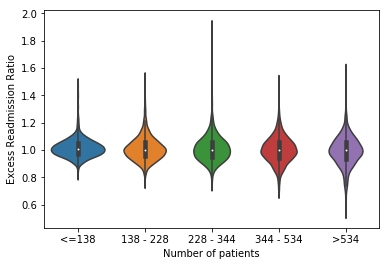

In [38]:
sns.violinplot(x="Number of patients", y="Excess Readmission Ratio", data=clean_hospital_read_df)

In this visualization, is easier to see that there is no significant difference between the number of patients and readmission ratio as the mean of all the figures has a very similar mean